# Math Question Answer Verification Competition


Borrowed from [official Unsloth implementation](https://colab.research.google.com/drive/1Ys44kVvmeZtnICzWz0xgpRnrIOjZAuxp?usp=sharing#scrollTo=MKX_XKs_BNZR)

In [1]:
# %%capture
# This cell will take time
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
# !pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2024.11.7
Uninstalling unsloth-2024.11.7:
  Successfully uninstalled unsloth-2024.11.7
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-dtpbck2a/unsloth_2b32c521b3bc4bb0a63aeb4d6ec1cac5
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-dtpbck2a/unsloth_2b32c521b3bc4bb0a63aeb4d6ec1cac5
  Resolved https://github.com/unslothai/unsloth.git to commit f26d4e739ed507de7a9088da53d10fd02f58d160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.7-py3-none-any.whl size=163138 sha256=76b6366d651c36b9de7a1ad5e50cd7bbfade3484f4269d54e4a21b1b38a4980b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qih_k3fb/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [2]:
!nvidia-smi

Sun Nov 17 21:56:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [4]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

## Load model and wrap with LoRA adapters

In [5]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 64, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 64,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.11.7 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


## Competition dataset

In [6]:
# download and load competition dataset

from datasets import load_dataset
dataset = load_dataset("ad6398/nyu-dl-teach-maths-comp")
# print and see dataset
dataset

README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 1000000
    })
    test: Dataset({
        features: ['question', 'is_correct', 'answer', 'solution'],
        num_rows: 10000
    })
})

In [7]:
dataset['train'][42]

{'question': 'A loaf of bread was sliced into 15. Ten friends bought 4 loaves of bread. If they all eat all 4 loaves equally, how many slices of bread did each of them eat?',
 'is_correct': True,
 'answer': '6',
 'solution': "Let's solve this problem using Python's sympy library.\n<llm-code>\nimport sympy as sp\n\n# 10 friends bought 4 loaves of bread\nnumber_of_friends = 10\nloaves_purchased = 4\n\n# a loaf is cut into 15 slices\nslices_per_loaf = 15\n\n# if they eat all 4 loaves equally\nslices_per_person = (loaves_purchased * slices_per_loaf) / number_of_friends\n\n# answer\nslices_per_person\n</llm-code>\n<llm-code-output>\n6.0\n</llm-code-output>\nThus each person ate \\boxed{6} slices of bread."}

We changed the default prompt and made it more concise in during our training. We also fixed some typos and added Explanation to it.

In [9]:
prompt = """Verify if the answer to the given math question is correct or not. Your response should be 'True' if correct, otherwise 'False'. The question, answer and explanation (if any) are given below:


### Question:
{}

### Answer:
{}

### Explanation:
{}

### Output:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts(examples):
    question = examples["question"]
    ans       = examples["answer"]
    solution  = examples["solution"]
    output      = examples["is_correct"]
    texts = []
    for q,a,e,o in zip(question, ans, solution, output):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = prompt.format(q,a,e,o) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }




In [10]:
# Process the training dataset and generate prompt for each datapoint

train_dataset = dataset['train'].map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [13]:
import random
random.seed(42)

In [14]:
train_dataset = train_dataset.shuffle()  # This shuffles the dataset

In [12]:
train_dataset[0]['text']

"Verify if the answer to the given math question is correct or not. Your response should be 'True' if correct, otherwise 'False'. The question, answer and explanation (if any) are given below:\n\n\n### Question:\nWhat is the radius of the circle inscribed in triangle $ABC$ if $AB = 22, AC=12,$ and $BC=14$? Express your answer in simplest radical form.\n\n### Answer:\n3.16227766016838\n\n### Explanation:\nThe circle is inscribed in a triangle, and we know the sides of the triangle.\nTo use the inradius formula, we need to know the area of the triangle.\nWe can use Heron's formula to calculate the area.\n<llm-code>\nimport math\nfrom sympy import *\n\nAB, AC, BC = 22, 12, 14\n\n# Calculate the semiperimeter and area using Heron's formula\ns = (AB + AC + BC) / 2\nK = sqrt(s * (s - AB) * (s - AC) * (s - BC))\n\nprint(K)\n</llm-code>\n<llm-code-output>\n75.8946638440411\n</llm-code-output>\nLet's now use the formula for the radius of the inscribed circle.\n<llm-code>\nr = K / s\nprint(r)\n<

In [17]:
from collections import Counter

In [18]:
Counter(train_dataset['is_correct'])

Counter({True: 400000, False: 600000})

This means our dataset as a whole is imbalanced, with 200,000 more 'False' items than 'True'.

In [20]:
from datasets import interleave_datasets

In [21]:
true_subset = train_dataset.filter(lambda x: x['is_correct'])
false_subset = train_dataset.filter(lambda x: not x['is_correct'])

Filter:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000000 [00:00<?, ? examples/s]

In [23]:
print(len(true_subset), len(false_subset))

400000 600000


In [25]:
# Find the smaller subset size
min_size = min(len(true_subset), len(false_subset))

# Downsample both to the size of the smaller subset
true_balanced = true_subset.shuffle().select(range(min_size))
false_balanced = false_subset.shuffle().select(range(min_size))

In [26]:
print(len(true_balanced), len(false_balanced))

400000 400000


Since we have more than enough datapoints anyway, the downsampling is fine.

In [27]:
interleaved_dataset = interleave_datasets([true_balanced, false_balanced])

In [28]:
interleaved_dataset['is_correct'][:8]

[True, False, True, False, True, False, True, False]

As we can see, the dataset is now interleaved, such that we get equal proportion of both True and False in our batches

## SFT

In [30]:
#@title Validation Split
num_validation_samples = 256

# Split the train_dataset into training and validation
train_dataset_split = train_dataset.select(range(len(train_dataset) - num_validation_samples))  # First part for training
val_dataset = train_dataset.select(range(len(train_dataset) - num_validation_samples, len(train_dataset))) # This part is for validation

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

training_args = TrainingArguments(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 200,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        fp16_full_eval = True,
        per_device_eval_batch_size = 4,
        eval_accumulation_steps = 4,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
        save_steps = 50,  # Save model every 50 steps
        save_strategy = "steps",  # Save based on steps
        save_total_limit = 2,
        eval_steps=25,  # Run validation every 25 steps
        eval_strategy="steps",  # Ensure evaluation is done based on steps
        load_best_model_at_end=True,
    )

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    # train_dataset = train_dataset,
    train_dataset=train_dataset_split,
    eval_dataset=val_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False, # Can make training 5x faster for short sequences.
    args = training_args
)

Map (num_proc=4):   0%|          | 0/999744 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/256 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


**Note:** This is not the original run that gave the best results. But it provides a good example of how we trained our model.

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 999,744 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 4 | Gradient Accumulation steps = 4
\        /    Total batch size = 16 | Total steps = 200
 "-____-"     Number of trainable parameters = 125,829,120


Step,Training Loss,Validation Loss
25,0.729400,0.576701
50,0.513900,0.592790
75,0.564800,0.605553
100,0.512600,0.590604
125,0.499100,0.577688
150,0.521500,0.571446
175,0.516300,0.563319
200,0.482500,0.559421


In [ ]:
trainer.args.max_steps += 25

In [ ]:
trainer_stats = trainer.train(resume_from_checkpoint=True)

/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3354: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(checkpoint, OPTIMIZER_NAME), map_

Step,Training Loss,Validation Loss
725,0.505500,0.509122


In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from datetime import datetime
folder_name = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
!mkdir -p /content/drive/MyDrive/DL_Midterm/{folder_name}
!cp lora_model.zip /content/drive/MyDrive/DL_Midterm/{folder_name}
print(folder_name)

2024-11-14_08-37-17


In [97]:
import json
with open('trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

In [98]:
train_loss = list(map(lambda x: x['loss'],filter(lambda x: 'loss' in x,trainer_state['log_history'])))
eval_step = 25
# We take the mean of train_loss across 25 steps
train_loss_averaged = [sum(train_loss[i:i + eval_step]) / eval_step for i in range(0, len(train_loss), eval_step)]

In [99]:
val_loss = list(map(lambda x: x['eval_loss'],filter(lambda x: 'eval_loss' in x,trainer_state['log_history'])))
val_steps = list(map(lambda x: x['step'],filter(lambda x: 'eval_loss' in x ,trainer_state['log_history'])))

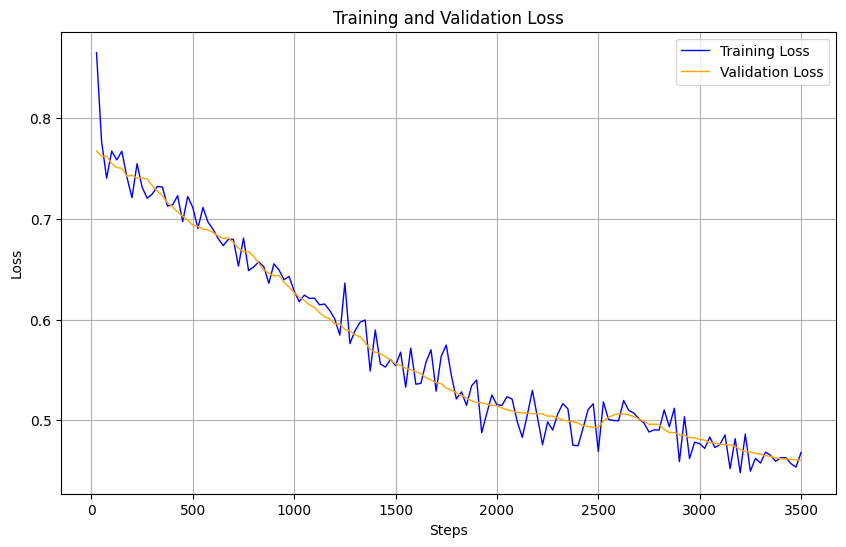

In [101]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(val_steps, train_loss_averaged, label='Training Loss', color='blue', linewidth=1)
plt.plot(val_steps, val_loss, label='Validation Loss', color='orange', linewidth=1)

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


## Inference

In [103]:
test_dataset = dataset['test']

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

This is the main inference code that we used:

In [ ]:
from tqdm import tqdm
FastLanguageModel.for_inference(model)
answers = []
for i in tqdm(range(len(test_dataset))):
    ques = test_dataset['question'][i]
    ans = test_dataset['answer'][i]
    sol = test_dataset['solution'][i]
    input_prompt = prompt.format(
        ques, # ques
        ans, # given answer
        sol, # solution/explanation
        "", # output
    )
    inputs = tokenizer(
    [
        input_prompt
    ], return_tensors = "pt").to("cuda")
    input_shape = inputs['input_ids'].shape
    input_token_len = input_shape[1] # 1 because of batch
    outputs = model.generate(**inputs, max_new_tokens = 8, do_sample= False)
    response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
    answers.append((i, response[0] == "True"))

100%|██████████| 10000/10000 [37:41<00:00,  4.42it/s]


In [ ]:
import csv
with open('submission.csv', 'w', newline='') as csvfile:

  writer = csv.writer(csvfile)

  writer.writerow(['ID', 'is_correct'])

  writer.writerows(answers)

**Batch Inference:**

*Note:* This method seems to give different results compared to the one above, even with `do_sample=False`. We also noticed that the results given by it isn't as reliable as the one given by the code above, based on submission accuracy.

In [130]:
from tqdm import tqdm

batch_size = 8
answers = []

FastLanguageModel.for_inference(model)
for start_idx in tqdm(range(0, len(test_dataset), batch_size)):
    batch_samples = test_dataset[start_idx:start_idx + batch_size]
    batch_questions = batch_samples['question']
    batch_solutions = batch_samples['solution']
    batch_answers = batch_samples['answer']

    batch_prompts = [
        prompt.format(q, s, a, "")
        for q, s, a in zip(batch_questions, batch_solutions, batch_answers)
    ]


    inputs = tokenizer(
        batch_prompts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=2048
    ).to("cuda")


    with torch.no_grad():
      outputs = model.generate(
          input_ids=inputs['input_ids'],
          attention_mask=inputs['attention_mask'],
          max_new_tokens=8,
          do_sample=False,
      )

      decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)

      for i, output in enumerate(decoded_outputs):
        response = output.rsplit("### Output:", 1)[-1].strip()
        answers.append(response == "True")

      torch.cuda.empty_cache()

  0%|          | 0/1250 [00:04<?, ?it/s]


In [ ]:
answers = [[i,v] for i,v in enumerate(answers)]

In [ ]:
import csv
with open('submission.csv', 'w', newline='') as csvfile:

  writer = csv.writer(csvfile)

  writer.writerow(['ID', 'is_correct'])

  writer.writerows(answers)